In [1]:
import pandas as pd
from sqlalchemy import create_engine
from arch import arch_model
from assets.PostgresManager import PostgresModel
from warnings import filterwarnings 
filterwarnings("ignore")
from assets.GARCHModel import GarchModel
import yfinance as yf

In [2]:
dbmodel = PostgresModel()

Schema 'logs' created or already exists.


Schema 'logs' created or already exists.


/home/luxauera/Masaüstü/Algorithm/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [26]:
predict = []
for i in yf.download("A1CAP.IS").reset_index()["Date"].astype(str)[1:]:
    model = GarchModel(schema="bistall",table_name="A1CAP" , end_date=i)
    predict.append(model.predicted_price)
predict.insert(0,0)

[*********************100%***********************]  1 of 1 completed
/home/luxauera/Masaüstü/Algorithm/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' cr

/home/luxauera/Masaüstü/Algorithm/.venv/lib/python3.12/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' created or already exists.
Schema 'logs' cr

In [27]:
df = yf.download("A1CAP.IS")[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


In [28]:
df["Predict"] = predict

In [65]:
fdf = pd.DataFrame({"Date":[x for x in df.index.values] ,  "Real":[float(i) for i in df["Adj Close"]["A1CAP.IS"]] , "Pred":[float(x) for x in df["Predict"]] }).set_index("Date")

In [84]:
fdf.to_csv("A1CAP.csv")

<Axes: xlabel='Date'>

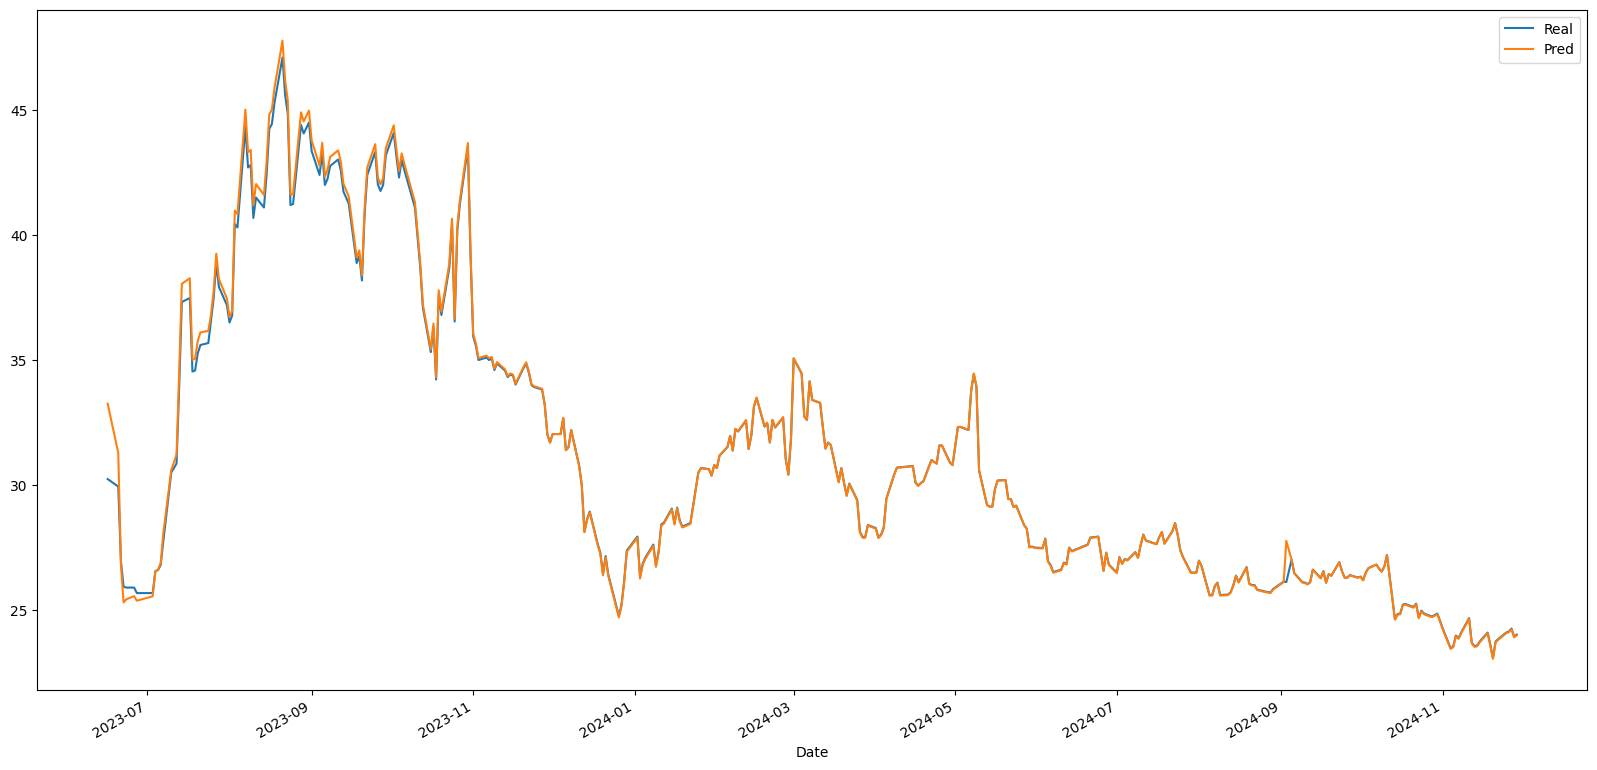

In [ ]:
# plot big size fdf

fdf.plot(figsize=(20,10))
